In [1]:
import tensorflow as tf
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.mlab as mlab
import math
import random

/home/akashrajkn/.conda/envs/ull/lib/python2.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


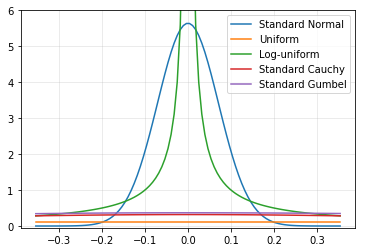

In [68]:
# Standard normal
mu = 0
variance = 0.005
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, mlab.normpdf(x, mu, sigma), label='Standard Normal')
# plt.show()

# Uniform 
plt.plot(x, (1 + (x*0))/ 10, label='Uniform')

# log uniform
plt.plot(x, np.absolute(0.1 / x), label='Log-uniform')

# Standard cauchy
# cauchy.pdf(x) = 1 / (pi * (1 + x**2))
plt.plot(x, 1 / (np.pi * (1 + x**2)), label='Standard Cauchy')

# Standard Gumbel
plt.plot(x, np.exp(-(x + np.exp(-x))), label='Standard Gumbel')

plt.ylim(ymax = 6, ymin=-0.05)
plt.grid(alpha=.3)
plt.legend()
plt.show()


In [20]:
#####
# Test if other kl_s can be computed using tensorflow

import tensorflow.contrib.distributions as distributions

# m = [[0.,1.], [2.,3.]]
# v = [[1.,1.], [2.,2.]]

m = 0.
v = 1.

tfd = tf.contrib.distributions

normal = tfd.Normal(loc=m, scale=v)
n_2 = tfd.Uniform(low=-2., high=2.)

# laplace = tf.distributions.Laplace(loc=0., scale=1.)

mix = 0.3
mixture = tfd.Mixture(
  cat=tfd.Categorical(probs=[mix, 1.-mix]),
  components=[
    tfd.Normal(loc=-1., scale=0.1),
    tfd.Normal(loc=+1., scale=0.5),
])

mix_2 = 1.
mixture_2 = tfd.Mixture(
  cat=tfd.Categorical(probs=[mix_2, 1.-mix_2]),
  components=[
    tfd.Normal(loc=0., scale=1.),
    tfd.Normal(loc=+1., scale=0.5),
])


kld = tf.distributions.kl_divergence(mixture, mixture_2)

# print(laplace.kl_divergence(normal))
# print(tf.distributions.kl_divergence(n_2, normal))

# normal = tf.distributions.Normal(loc=0., scale=3.)

NotImplementedError: No KL(distribution_a || distribution_b) registered for distribution_a type Mixture and distribution_b type Mixture

## Helper functions

In [2]:
def save_variable_to_file(name, filename):
    named_variable = [v for v in tf.trainable_variables() if v.name == name][0]    
    named_variable_np_array = named_variable.eval()
    
    with open(filename, "w") as outfile:
        np.save(outfile, named_variable_np_array)
    print('Variable: {} saved to file'.format(name))


In [136]:
model = 'mnist_standard_gumbel'
model_path = '../../models/mnf/{}_epochs-25/'.format(model)

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('{}mnf.meta'.format(model_path))
    saver.restore(sess, tf.train.latest_checkpoint(model_path))

#     for v in tf.global_variables():
#         print(v)

    save_variable_to_file("fq2_fr2_usezTrue/densemnf_1/mean_W:0", "../../models/mnf/weights/mean_layer1_{}.npz".format(model))
    save_variable_to_file("fq2_fr2_usezTrue/densemnf_1/var_W:0", "../../models/mnf/weights/var_layer1_{}.npz".format(model))

    save_variable_to_file("fq2_fr2_usezTrue/densemnf_2/mean_W:0", "../../models/mnf/weights/mean_layer2_{}.npz".format(model))
    save_variable_to_file("fq2_fr2_usezTrue/densemnf_2/var_W:0", "../../models/mnf/weights/var_layer2_{}.npz".format(model))

INFO:tensorflow:Restoring parameters from ../../models/mnf/mnf_log-uniform_FIXED_MNIST/mnf


In [3]:
def plot_function(weights, subset=True, savefile=None):
    '''
    Plot heatmaps
    '''
    if subset:
        weights = weights[:50, :50]    
    plt.clf()
    plt.imshow(weights)
    plt.colorbar()
    
    if savefile is not None:
        plt.savefig(savefile)

def plot_function_2(weights, savefile=None):
    masked_array = np.ma.masked_where(weights == 0.0, weights)

    cmap = matplotlib.cm.spring  # Can be any colormap that you want after the cm
    cmap.set_bad(color='black')

    plt.clf()
    plt.imshow(masked_array, cmap=cmap)
#     plt.colorbar(im)
#     plt.show()

    if savefile is not None:
        plt.savefig(savefile)
    plt.show()

## Results on the MNIST data

In [ ]:
weights = np.load("../../models/mnf/weights/layer1_std-normal.npz")
plot_function(weights)

In [ ]:
weights = np.load("../../models/mnf/weights/layer1_cauchy_10-epochs.npz")
plot_function(weights)

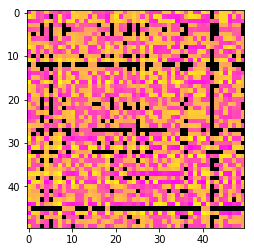

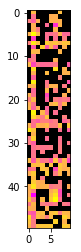

Number of zeros: 2352/5000


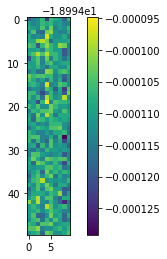

In [122]:
cutoff_threshold = 1

# ************************************* Layer 1 *************************************

# >>>>> Mean Weights
mean_weights_1 = np.load("../../models/mnf/weights/mean_layer1_{}.npz".format(model))
mean_weights_1[(mean_weights_1 >= -cutoff_threshold) & (mean_weights_1 <= cutoff_threshold)] = 0.0

mean_weights_1_1 = mean_weights_1[:50, :50]
mean_weights_1_2 = mean_weights_1[220:270, :50]
mean_weights_1_3 = mean_weights_1[350:400, :50]
plot_function_2(mean_weights_1_1, savefile='../../results/log-uniform_dense1_thres-1.png')

# plot_function(mean_weights_1, subset = False)

# >>>>> Var Weights
# var_weights_1 = np.load("../../models/mnf/weights/var_layer1_{}.npz".format(model))
# plot_function(var_weights_1)

# ************************************* Layer 2 *************************************

# >>>>> Mean Weights

cutoff_threshold = .1

mean_weights_2 = np.load("../../models/mnf/weights/mean_layer2_{}.npz".format(model))
mean_weights_2[(mean_weights_2 >= -cutoff_threshold) & (mean_weights_2 <= cutoff_threshold)] = 0.0

mean_weights_2_1 = mean_weights_2[:50, :]
mean_weights_2_2 = mean_weights_2[220:270, :]
mean_weights_2_3 = mean_weights_2[350:400, :]
plot_function_2(mean_weights_2_1, savefile='../../results/log-uniform_dense2_thres-0.1.png')

x_axis_range = 500
y_axis_range = 10
count = 0
for i in range(x_axis_range):
    for j in range(y_axis_range):
        if mean_weights_2[i, j] >= -.1 and mean_weights_2[i, j] <= .1:
            count += 1

print('Number of zeros: {}/{}'.format(count, x_axis_range * y_axis_range))

# >>>>> Var Weights
var_weights_2 = np.load("../../models/mnf/weights/var_layer2_{}.npz".format(model))

var_weights_2_1 = var_weights_2[:50, :]
var_weights_2_2 = var_weights_2[220:270, :]
var_weights_2_3 = var_weights_2[350:400, :]
plot_function(var_weights_2_1, subset=False)

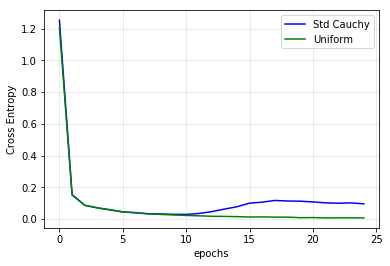

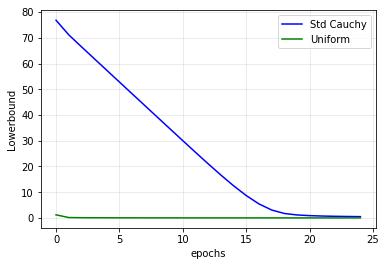

In [2]:
# Entropies and lowerbounds

# std normal
# with open('../../models/mnf/mnist_standard_normal', 'rb') as f:
#     dictionary_sn = pickle.load(f)

# # log uniform
# with open('../../models/mnf/mnist_log_uniform', 'rb') as f:
#     dictionary_lu = pickle.load(f)

# # std cauchy
with open('../../models/mnf/mnist_standard_cauchy', 'rb') as f:
    dictionary_sc = pickle.load(f)

# # std Gumbel
with open('../../models/mnf/mnist_uniform', 'rb') as f:
    dictionary_u = pickle.load(f)

plt.grid(alpha=.3)
# ax_a = plt.plot(dictionary_sn['entropies'], c='red', label='std normal')
# ax_b = plt.plot(dictionary_lu['entropies'], c='green', label='log uniform')
ax_c = plt.plot(dictionary_sc['entropies'], c='blue', label='Std Cauchy')
ax_u = plt.plot(dictionary_u['entropies'], c='green', label='Uniform')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Cross Entropy')

plt.figure()
plt.grid(alpha=.3)
# ax_a = plt.plot(dictionary_sn['lowerbounds'], c='red', label='std normal')
ax_c = plt.plot(dictionary_sc['lowerbounds'], c='blue', label='Std Cauchy')
ax_u = plt.plot(dictionary_u['entropies'], c='green', label='Uniform')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Lowerbound')
plt.savefig('../../results/lowerbound_normal_cauchy.png')

In [30]:
def entropy_predictive_distribution(distribution):
    '''
    Compute entropy for (disrete) predictive distribution
    '''
    entropy = 0
    for p in distribution:
        if p != 0.0:
            entropy += (-p * np.log(p))

    return entropy

def plot_entropy_histogram(preds, name, cumulative=True, histtype='step'):
    '''
    Plot histogram of entropy of predictive distritbution
    '''
    entropies = []
    for pred in preds:
        entropies.append(entropy_predictive_distribution(pred))

    bins = np.linspace(0, 2.5, 50).tolist()
    bins = bins + [np.inf]
    weights = np.ones_like(entropies)/float(len(entropies))
    n, x, _ = plt.hist(entropies, bins=bins, cumulative=cumulative, histtype=histtype, label=name, density=True, stacked=True, weights=weights)

In [ ]:
# create notMNIST dataset

def create_not_mnist_data():
    xtest = np.load('../../data/mnist/xtest')
    ytest = np.load('../../data/mnist/ytest')

    print xtest.shape
    print ytest.shape

    plt.imshow(xtest[2])

    data_test = {
        'xtest': xtest,
        'ytest': ytest
    }

    with open('../../data/mnist/notmnist_test.pkl', 'wb') as f:
        pickle.dump(data_test, f)

In [ ]:
# create Toy Regression data

def create_toy_regression_data(num_points=20):

    x = np.random.uniform(-4, 4, num_points)
    y = []
    for i in x:
        y_i = i**3 + np.random.normal(0, 9)
        y.append(y_i)

    y = np.array(y)
    
    data = {
        'X': x,
        'y': y
    }

    with open('../../data/toy_regression_data.pkl', 'rb') as f:
        pickle.dump(data, f)

### Experiment 1: MNIST - MNIST

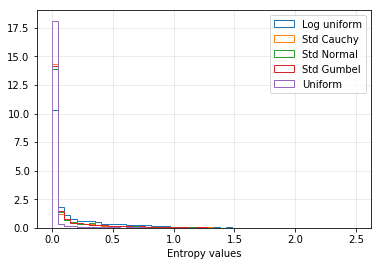

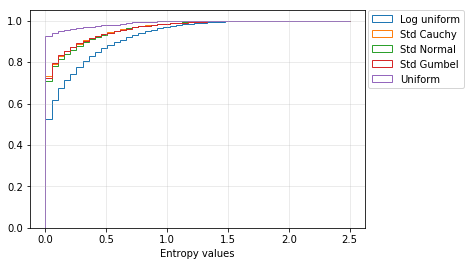

In [38]:
# MNIST - MNIST

preds_log_uniform = np.load('../../models/mnf/mnist_log_uniform_preds_experiment_1')
preds_std_cauchy = np.load('../../models/mnf/mnist_standard_cauchy_preds_experiment_1')
preds_std_normal = np.load('../../models/mnf/mnist_standard_normal_preds_experiment_1')
preds_std_gumbel = np.load('../../models/mnf/mnist_standard_gumbel_preds_experiment_1')
preds_uniform = np.load('../../models/mnf/mnist_uniform_preds_experiment_1')

plt.grid(alpha=.3)
plot_entropy_histogram(preds_log_uniform, 'Log uniform', cumulative=False)
plot_entropy_histogram(preds_std_cauchy, 'Std Cauchy', cumulative=False)
plot_entropy_histogram(preds_std_normal, 'Std Normal', cumulative=False)
plot_entropy_histogram(preds_std_gumbel, 'Std Gumbel', cumulative=False)
plot_entropy_histogram(preds_uniform, 'Uniform', cumulative=False)
plt.xlabel('Entropy values')
plt.legend()

plt.figure()
plt.grid(alpha=.3)
plot_entropy_histogram(preds_log_uniform, 'Log uniform')
plot_entropy_histogram(preds_std_cauchy, 'Std Cauchy')
plot_entropy_histogram(preds_std_normal, 'Std Normal')
plot_entropy_histogram(preds_std_gumbel, 'Std Gumbel')
plot_entropy_histogram(preds_uniform, 'Uniform')

plt.xlabel('Entropy values')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

Since the test set is MNIST, the classes are known. This results in small entropies as shown in top figure. The bottom figure shows the empirical Cumulative distribution.

### Experiment 3: MNIST - MNIST-rot

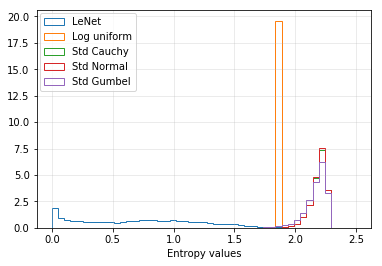

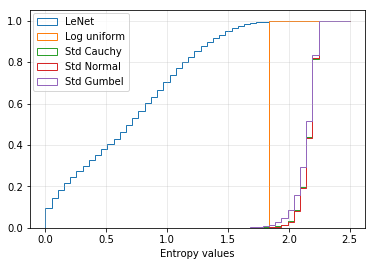

In [42]:
# MNIST - MNIST-rot

lenet_preds = np.load('../../models/lenet/preds_experiment_3_rotMNIST')
preds_log_uniform = np.load('../../models/mnf/mnist_log_uniform_preds_experiment_3')
preds_std_cauchy = np.load('../../models/mnf/mnist_standard_cauchy_preds_experiment_3')
preds_std_normal = np.load('../../models/mnf/mnist_standard_normal_preds_experiment_3')
preds_std_gumbel = np.load('../../models/mnf/mnist_standard_gumbel_preds_experiment_3')
preds_uniform = np.load('../../models/mnf/mnist_uniform_preds_experiment_3')

plt.grid(alpha=.3)
plot_entropy_histogram(lenet_preds, 'LeNet', cumulative=False)
plot_entropy_histogram(preds_log_uniform, 'Log uniform', cumulative=False)
plot_entropy_histogram(preds_std_cauchy, 'Std Cauchy', cumulative=False)
plot_entropy_histogram(preds_std_normal, 'Std Normal', cumulative=False)
plot_entropy_histogram(preds_std_gumbel, 'Std Gumbel', cumulative=False)
# plot_entropy_histogram(preds_uniform, 'Uniform', cumulative=False)
plt.xlabel('Entropy values')
plt.legend(bbox_to_anchor=(0.01, 0.99), loc=2, borderaxespad=0.)
# plt.legend()

plt.figure()
plt.grid(alpha=.3)
plot_entropy_histogram(lenet_preds, 'LeNet')
plot_entropy_histogram(preds_log_uniform, 'Log uniform')
plot_entropy_histogram(preds_std_cauchy, 'Std Cauchy')
plot_entropy_histogram(preds_std_normal, 'Std Normal')
plot_entropy_histogram(preds_std_gumbel, 'Std Gumbel')
# plot_entropy_histogram(preds_uniform, 'Uniform')

plt.xlabel('Entropy values')
plt.legend(bbox_to_anchor=(0.01, 0.99), loc=2, borderaxespad=0.)

### EXPERIMENT 4: MNIST - notMNIST

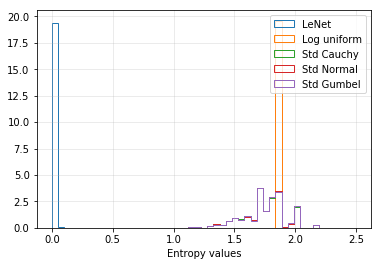

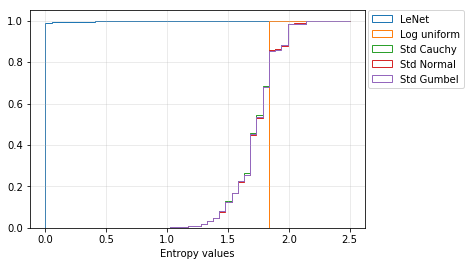

In [40]:
# MNIST - notMNIST

lenet_preds = np.load('../../models/lenet/preds_experiment_4_notmnist')
preds_log_uniform = np.load('../../models/mnf/mnist_log_uniform_preds_experiment_4')
preds_std_cauchy = np.load('../../models/mnf/mnist_standard_cauchy_preds_experiment_4')
preds_std_normal = np.load('../../models/mnf/mnist_standard_normal_preds_experiment_4')
preds_std_gumbel = np.load('../../models/mnf/mnist_standard_gumbel_preds_experiment_4')
preds_uniform = np.load('../../models/mnf/mnist_uniform_preds_experiment_4')

plt.grid(alpha=.3)
plot_entropy_histogram(lenet_preds, 'LeNet', cumulative=False)
plot_entropy_histogram(preds_log_uniform, 'Log uniform', cumulative=False)
plot_entropy_histogram(preds_std_cauchy, 'Std Cauchy', cumulative=False)
plot_entropy_histogram(preds_std_normal, 'Std Normal', cumulative=False)
plot_entropy_histogram(preds_std_gumbel, 'Std Gumbel', cumulative=False)
# plot_entropy_histogram(preds_uniform, 'Uniform', cumulative=False)
plt.xlabel('Entropy values')
plt.legend()

plt.figure()
plt.grid(alpha=.3)
plot_entropy_histogram(lenet_preds, 'LeNet')
plot_entropy_histogram(preds_log_uniform, 'Log uniform')
plot_entropy_histogram(preds_std_cauchy, 'Std Cauchy')
plot_entropy_histogram(preds_std_normal, 'Std Normal')
plot_entropy_histogram(preds_std_gumbel, 'Std Gumbel')
# plot_entropy_histogram(preds_uniform, 'Uniform')

plt.xlabel('Entropy values')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

### Experiment 5: MNIST - rot90-MNIST

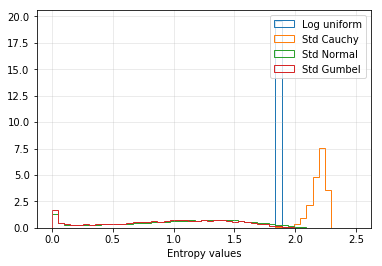

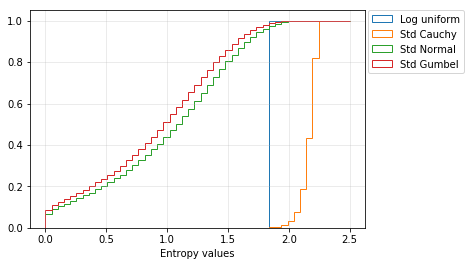

In [41]:
# MNIST - rot90-MNIST

# lenet_preds = np.load('../../models/lenet/preds_experiment_5_notmnist')
preds_log_uniform = np.load('../../models/mnf/mnist_log_uniform_preds_experiment_5')
preds_std_cauchy = np.load('../../models/mnf/mnist_standard_cauchy_preds_experiment_5')
preds_std_normal = np.load('../../models/mnf/mnist_standard_normal_preds_experiment_5')
preds_std_gumbel = np.load('../../models/mnf/mnist_standard_gumbel_preds_experiment_5')
# preds_uniform = np.load('../../models/mnf/mnist_uniform_preds_experiment_5')

plt.grid(alpha=.3)
# plot_entropy_histogram(lenet_preds, 'LeNet', cumulative=False)
plot_entropy_histogram(preds_log_uniform, 'Log uniform', cumulative=False)
plot_entropy_histogram(preds_std_cauchy, 'Std Cauchy', cumulative=False)
plot_entropy_histogram(preds_std_normal, 'Std Normal', cumulative=False)
plot_entropy_histogram(preds_std_gumbel, 'Std Gumbel', cumulative=False)
# plot_entropy_histogram(preds_uniform, 'Uniform', cumulative=False)
plt.xlabel('Entropy values')
plt.legend()

plt.figure()
plt.grid(alpha=.3)
# plot_entropy_histogram(lenet_preds, 'LeNet')
plot_entropy_histogram(preds_log_uniform, 'Log uniform')
plot_entropy_histogram(preds_std_cauchy, 'Std Cauchy')
plot_entropy_histogram(preds_std_normal, 'Std Normal')
plot_entropy_histogram(preds_std_gumbel, 'Std Gumbel')
# plot_entropy_histogram(preds_uniform, 'Uniform')

plt.xlabel('Entropy values')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

### Experiment 6: Regression on Toy data

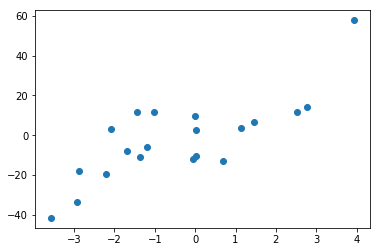

In [20]:
plt.scatter(x, y)

In [ ]:
weights = np.load("../../models/mnf/weights/layer1_log-uniform_clipped-alpha.npz")
plot_function(weights)

In [ ]:
weights = np.load("../../models/mnf/weights/layer1_log-uniform_recent.npz")
weights = weights[:50, :50]
weights[(weights >= -1) & (weights <= 1)] = 0.0
plot_function_2(weights)

In [ ]:
mean_weights = np.load("../../models/mnf/weights/mean_layer1_log-uniform_clipped-alpha.npz")
var_weights = np.load("../../models/mnf/weights/var_layer1_log-uniform_clipped-alpha.npz")

# mean_weights = mean_weights[:50, :50]
# var_weights = var_weights[:50, :50]

mean_weights[(mean_weights >= -1) & (mean_weights <= 1)] = 0.0

# print(mean_weights)

count = 0
for i in range(800):
    for j in range(500):
#         if var_weights[i, j] < -14:
        if mean_weights[i, j] == var_weights[i, j]:
            count += 1
            mean_weights[i, j] = 0.0

print(count)
# plot_function_2(mean_weights)
plot_function_2(mean_weights)

In [4]:
from mnist import MNIST
from keras.utils.np_utils import to_categorical

mnist = MNIST()
(xtrain, ytrain), (xvalid, yvalid), (xtest, ytest) = mnist.images()
xtrain, xvalid, xtest = np.transpose(xtrain, [0, 2, 3, 1]), np.transpose(xvalid, [0, 2, 3, 1]), np.transpose(xtest, [0, 2, 3, 1])
ytrain, yvalid, ytest = to_categorical(ytrain, 10), to_categorical(yvalid, 10), to_categorical(ytest, 10)

Using TensorFlow backend.


In [24]:
print xtest.shape

(10000, 28, 28, 1)


In [28]:
# Create mnist_rot90 test set
xtest__ = []

for i in range(xtest.shape[0]):
    x_i = np.rot90(X[i])
    x_i = x_i.reshape((28, 28, 1))
    xtest__.append(x_i)

xtest__ = np.array(xtest__)

data_test = {
    'xtest': xtest__,
    'ytest': ytest
}

with open('../../data/mnist/mnist_test_rot90.pkl', 'wb') as f:
    pickle.dump(data_test, f)
    
print('Created MNIST rot90 test set')

In [144]:
from wrappers import MNFLeNet


weights = np.load("../../models/mnf/weights/mean_layer2_log-uniform_FIXED_MNIST.npz")
weights[(weights >= -.1) & (weights <= .1)] = 0.0


# N, height, width, n_channels = xtrain.shape
# iter_per_epoch = N / 100
# input_shape = [None, height, width, n_channels]
# model = MNFLeNet(N, input_shape=input_shape, flows_q=2, flows_r=2, use_z=False,
#                  learn_p=True, thres_var=0.5, flow_dim_h=50)

# x = tf.placeholder(tf.float32, input_shape, name='x')
# y_ = tf.placeholder(tf.float32, [None, 10], name='y_')
# y = model.predict(x)
# yd = model.predict(x, sample=False)
# pyx = tf.nn.softmax(y)

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('../../models/mnf/TEST/mnf.meta')
    saver.restore(sess, tf.train.latest_checkpoint('../../models/mnf/TEST/'))

    w = [v for v in tf.trainable_variables() if v.name == "fq2_fr2_usezTrue/densemnf_2/mean_W:0"][0]
    w_new = w.assign(tf.convert_to_tensor(weights))
    sess.run(w_new)

#     for v in tf.global_variables():
#         print(v)
    
#     preds = np.zeros_like(ytest)
#     for i in xrange(10):
#         for j in xrange(xtest.shape[0] / 100):
#             pyxi = sess.run(pyx, feed_dict={x: xtest[j * 100:(j + 1) * 100]})
#             preds[j * 100:(j + 1) * 100] += pyxi / 10
#     print
#     sample_accuracy = np.mean(np.equal(np.argmax(preds, 1), np.argmax(ytest, 1)))
#     print '  - Sample test accuracy: {}'.format(sample_accuracy)

INFO:tensorflow:Restoring parameters from ../../models/mnf/TEST/mnf


## Results on the CIFAR-10 data

In [3]:
from cifar10 import CIFAR10
from keras.utils.np_utils import to_categorical

cifar10 = CIFAR10()
(xtrain, ytrain), (xvalid, yvalid), (xtest, ytest) = cifar10.images()
xtrain, xvalid, xtest = np.transpose(xtrain, [0, 2, 3, 1]), np.transpose(xvalid, [0, 2, 3, 1]), np.transpose(xtest, [0, 2, 3, 1])
ytrain, yvalid, ytest = to_categorical(ytrain, 10), to_categorical(yvalid, 10), to_categorical(ytest, 10)

print xtrain.shape

(40000, 32, 32, 3)


In [7]:
# weights = np.load("../../models/mnf/weights/layer1_log-uniform_10-epochs_cifar10.npz")
import cPickle as pickle
with open('../../data/cifar10/data_batch_1', 'rb') as f:
    cifar = pickle.load(f)

(10000, 3072)
(32, 32, 3)


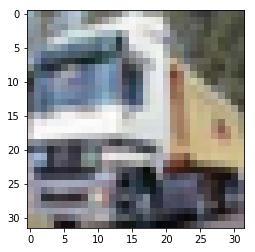

In [15]:

data = cifar['data']
print data.shape

n = np.reshape(data, (data.shape[0], 3, 32, 32))

xtrain = np.transpose(n, [0, 2, 3, 1])

print xtrain[1].shape

plt.imshow(xtrain[1])


# single_image = np.array(data[1])
# single_image_reshaped = np.transpose(np.reshape(single_image,(3, 32, 32)), (1, 2, 0))
# # print(single_image)
# # plt.imshow(single_image_reshaped)
# print single_image_reshaped.shape

### Accuracy as a function of confidence

In [18]:
from mnist import MNIST
from keras.utils.np_utils import to_categorical

mnist = MNIST()
(xtrain, ytrain), (xvalid, yvalid), (xtest, ytest) = mnist.images()
print xtrain.shape
xtrain, xvalid, xtest = np.transpose(xtrain, [0, 2, 3, 1]), np.transpose(xvalid, [0, 2, 3, 1]), np.transpose(xtest, [0, 2, 3, 1])
ytrain, yvalid, ytest = to_categorical(ytrain, 10), to_categorical(yvalid, 10), to_categorical(ytest, 10)

print xtrain.shape
print ytrain.shape

Using TensorFlow backend.


(50000, 1, 28, 28)
(50000, 28, 28, 1)
(50000, 10)


In [26]:
test_data_path = '../../data/mnist/notmnist_test.pkl'
with open(test_data_path, 'rb') as f:
    notmnist = pickle.load(f)

ytest_notmnist = notmnist['ytest']
ytest_notmnist = to_categorical(ytest_notmnist, 10)

In [19]:
print ytest.shape

(10000, 10)


In [53]:
def accuracy_vs_confidence(tau, preds, preds_notmnist, ytest, ytest_notmnist):
    acc_vs_tau = []
    acc_vs_tau_2 = []
    
    consider_1 = ytest.shape[0]
    consider_2 = ytest_notmnist.shape[0]
#     indices = random.sample(range(ytest_notmnist.shape[0]), consider_2)

    for t in tau:
        accuracy = 0
        filtered = 0
        for i in range(ytest.shape[0]):
            confidence = np.max(preds[i])
            if confidence >= t:
                filtered += 1
                if np.argmax(preds[i]) == np.argmax(ytest[i]):
                    accuracy += 1
        if filtered == 0:
            acc_vs_tau.append(0)
        else:
            acc_vs_tau.append(accuracy * 100 / filtered)

            
#     preds_notmnist = preds_notmnist[indices]
#     ytest_notmnist = ytest_notmnist[indices]

    for t in tau:
        accuracy = 0
        filtered = 0
        for i in range(ytest_notmnist.shape[0]):
            confidence = np.max(preds_notmnist[i])
            if confidence >= t:
                filtered += 1
                if np.argmax(preds[i]) == np.argmax(ytest_notmnist[i]):
                    accuracy += 1
        if filtered == 0:
            acc_vs_tau_2.append(0)
        else:
            acc_vs_tau_2.append(accuracy * 100 / filtered)

    ret_value = []

    for i in range(10):
        ret_value.append((acc_vs_tau[i] * consider_1 + acc_vs_tau_2[i] * consider_2)/ (consider_1 + consider_2))
    
    return ret_value

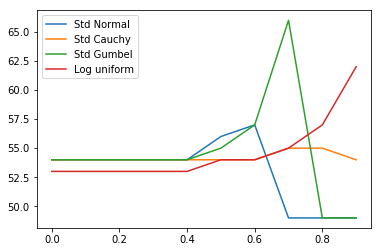

In [54]:
tau = []
for i in range(10):
    tau += [i * 0.1]

preds_log_uniform = np.load('../../models/mnf/mnist_log_uniform_preds_experiment_1')
preds_std_cauchy = np.load('../../models/mnf/mnist_standard_cauchy_preds_experiment_1')
preds_std_normal = np.load('../../models/mnf/mnist_standard_normal_preds_experiment_1')
preds_std_gumbel = np.load('../../models/mnf/mnist_standard_gumbel_preds_experiment_1')

preds_log_uniform_notmnist = np.load('../../models/mnf/mnist_log_uniform_preds_experiment_4')
preds_std_cauchy_notmnist = np.load('../../models/mnf/mnist_standard_cauchy_preds_experiment_4')
preds_std_normal_notmnist = np.load('../../models/mnf/mnist_standard_normal_preds_experiment_4')
preds_std_gumbel_notmnist = np.load('../../models/mnf/mnist_standard_gumbel_preds_experiment_4')


std_normal = accuracy_vs_confidence(tau, preds_std_normal, preds_std_normal_notmnist, ytest, ytest_notmnist)
std_cauchy = accuracy_vs_confidence(tau, preds_std_cauchy, preds_std_cauchy_notmnist, ytest, ytest_notmnist)
std_gumbel = accuracy_vs_confidence(tau, preds_std_gumbel, preds_std_gumbel_notmnist, ytest, ytest_notmnist)
std_log_uniform = accuracy_vs_confidence(tau, preds_log_uniform, preds_log_uniform_notmnist, ytest, ytest_notmnist)

plt.plot(tau, std_normal, label='Std Normal')
plt.plot(tau, std_cauchy, label='Std Cauchy')
plt.plot(tau, std_gumbel, label='Std Gumbel')
plt.plot(tau, std_log_uniform, label='Log uniform')

plt.legend()